In [1]:
import os
import numpy as np
from PIL import Image


In [2]:
train_path = 'Animals_DataSet/Training_Set'
validation_path = 'Animals_DataSet/Validation_Set'
test_path = 'Animals_DataSet/Test_Set'


In [3]:
def load_image(img_path):
    try:
        img = Image.open(img_path)  # Open the image
        img = img.convert('RGB')  # Ensure image is in RGB mode
        img = img.resize((32, 32))  # Resize to (32, 32)
        img_array = np.array(img)  # Convert to numpy array
        return img_array
        
    except Exception as e:
        print(f"Could not load image {img_path}: {e}")
        return None

def load_images_from_folder_with_labels(folder):
    images = []
    labels = []
    for label, subfolder in enumerate(os.listdir(folder)):
        subfolder_path = os.path.join(folder, subfolder)
        if not os.path.isdir(subfolder_path) or subfolder.startswith('.'):
            continue
        for filename in os.listdir(subfolder_path):
            if filename.startswith('.'):
                continue
            img_path = os.path.join(subfolder_path, filename)
            if img_path.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
                img_array = load_image(img_path)
                if img_array is not None:
                    images.append(img_array)
                    labels.append(label)

    return np.array(images), np.array(labels)

# Load images from training, validation, and test sets
train_images, train_labels = load_images_from_folder_with_labels(train_path)
validation_images, validation_labels = load_images_from_folder_with_labels(validation_path)
test_images, test_labels = load_images_from_folder_with_labels(test_path)

# Print shapes of images
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Validation images shape:", validation_images.shape)
print("Validation labels shape:", validation_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)


Train images shape: (4200, 32, 32, 3)
Train labels shape: (4200,)
Validation images shape: (1200, 32, 32, 3)
Validation labels shape: (1200,)
Test images shape: (600, 32, 32, 3)
Test labels shape: (600,)


In [4]:
import numpy as np
from keras.utils import to_categorical

# Check for unique labels before adjusting
print("Unique labels in train_labels before adjustment:", np.unique(train_labels))
print("Unique labels in validation_labels before adjustment:", np.unique(validation_labels))

# Subtract 1 from all labels to shift the range to [0, 5]
train_labels = train_labels - 1
validation_labels = validation_labels - 1

# Now check if the labels are in the valid range [0, 5]
print("Unique labels in train_labels after adjustment:", np.unique(train_labels))
print("Unique labels in validation_labels after adjustment:", np.unique(validation_labels))

# Apply one-hot encoding to the adjusted labels
train_labels = to_categorical(train_labels, num_classes=6)
validation_labels = to_categorical(validation_labels, num_classes=6)

# Check the shapes of the one-hot encoded labels
print("Train labels shape after one-hot encoding:", train_labels.shape)
print("Validation labels shape after one-hot encoding:", validation_labels.shape)

# Check the unique values in the one-hot encoded labels by checking the unique rows
unique_train_labels = np.unique(train_labels, axis=0)
unique_validation_labels = np.unique(validation_labels, axis=0)

print("Unique labels in train_labels after one-hot encoding:", unique_train_labels)
print("Unique labels in validation_labels after one-hot encoding:", unique_validation_labels)


Unique labels in train_labels before adjustment: [0 1 3 4 5 6]
Unique labels in validation_labels before adjustment: [0 1 3 4 5 6]
Unique labels in train_labels after adjustment: [-1  0  2  3  4  5]
Unique labels in validation_labels after adjustment: [-1  0  2  3  4  5]
Train labels shape after one-hot encoding: (4200, 6)
Validation labels shape after one-hot encoding: (1200, 6)
Unique labels in train_labels after one-hot encoding: [[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]
Unique labels in validation_labels after one-hot encoding: [[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]


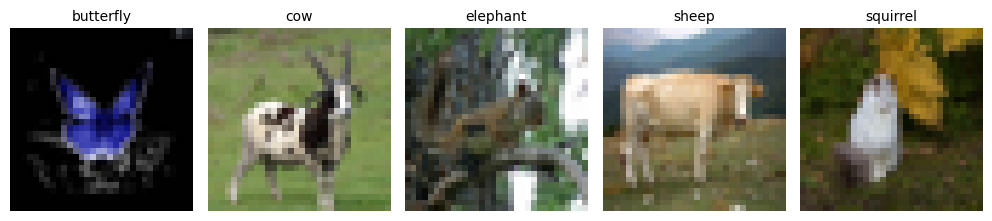

In [5]:
import matplotlib.pyplot as plt  # Ensure matplotlib is imported
%matplotlib inline

import numpy as np  # Ensure NumPy is imported

def show_one_image_per_class(images, labels, num_classes, class_names):
    # Dictionary to store one image per class
    class_images = {}

    # Loop over images and labels
    for img, label in zip(images, labels):
        # Extract the label index from the one-hot encoded label
        label_index = np.argmax(label)  # Get the index of the '1' in the one-hot encoding

        # Add the first image for each class
        if label_index not in class_images:
            class_images[label_index] = img
        if len(class_images) == num_classes:
            break

    # Display images
    plt.figure(figsize=(12, 6))
    for i, class_label in enumerate(sorted(class_images.keys())):
        plt.subplot(1, num_classes, i + 1)  # Use `i + 1` for the subplot index
        plt.imshow(class_images[class_label])
        plt.title(class_names[class_label], fontsize=10)  # Use label directly for class_names
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Assuming 6 classes in your dataset with these names
class_names = ["butterfly", "cat", "cow", "elephant", "sheep", "squirrel"]

# Show one image for each class in the training set
NUM_CLASSES = 6
show_one_image_per_class(train_images, train_labels, NUM_CLASSES, class_names)


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
def normalize_images(images):
    return images / 255.0  # Normalize pixel values to [0, 1]

In [8]:
train_images_normalized = normalize_images(train_images)
validation_images_normalized = normalize_images(validation_images)
test_images_normalized = normalize_images(test_images)

In [9]:
def get_class_counts(data_dir):
    class_counts = {}
    for class_dir in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_dir)
        if os.path.isdir(class_path):
            class_counts[class_dir] = len(os.listdir(class_path))
    return class_counts


In [10]:
train_class_counts = get_class_counts(train_path)
validation_class_counts = get_class_counts(validation_path)

In [11]:
print("Train class counts:", train_class_counts)
print("Validation class counts:", validation_class_counts)
print("Class names:", class_names)


Train class counts: {'cat': 700, 'butterfly': 700, 'sheep': 700, 'squirrel': 700, 'cow': 700, 'elephant': 700}
Validation class counts: {'cat': 200, 'butterfly': 200, 'sheep': 200, 'squirrel': 200, 'cow': 200, 'elephant': 200}
Class names: ['butterfly', 'cat', 'cow', 'elephant', 'sheep', 'squirrel']


In [12]:
import matplotlib.pyplot as plt
import numpy as np

def plot_class_distribution(class_names, class_counts, dataset_name):
    """
    Plots the class distribution as a bar graph with a legend.

    Parameters:
    - class_names: List of class names.
    - class_counts: Dictionary with class names as keys and counts as values.
    - dataset_name: Name of the dataset (e.g., "Training Set").
    """
    # Map counts based on class names
    counts = [class_counts.get(name, 0) for name in class_names]
    
    # Bar width and positions
    bar_positions = np.arange(len(class_names))
    
    # Plotting
    plt.figure(figsize=(5, 4))
    bars = plt.bar(bar_positions, counts, color='skyblue', edgecolor='black')

    # Add labels, title, and grid
    plt.xlabel("Class Names")
    plt.ylabel("Number of Images")
    plt.title(f"{dataset_name} Class Distribution")
    plt.xticks(bar_positions, class_names, rotation=45, ha="right")
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Adding legend
    legend_labels = [f"Class {i+1} ({name}: {counts[i]} images)" for i, name in enumerate(class_names)]
    plt.legend(bars, legend_labels, loc='upper right', title="Legend")
    
    # Show plot
    plt.show()


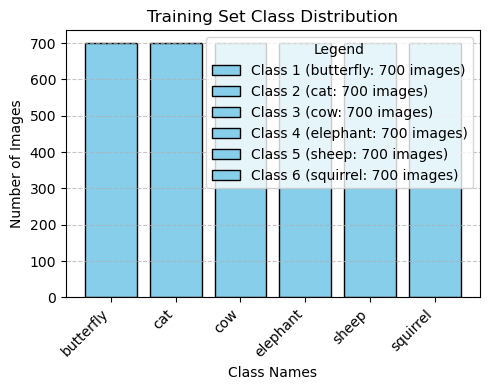

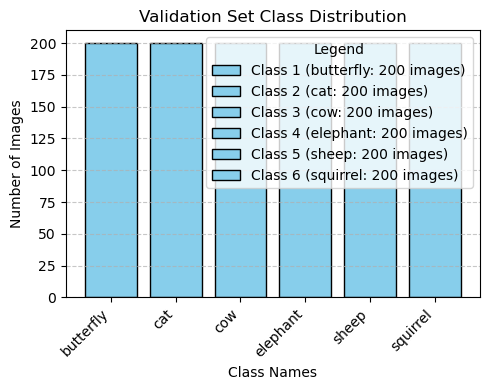

In [13]:
plot_class_distribution(class_names, train_class_counts, "Training Set")
plot_class_distribution(class_names, validation_class_counts, "Validation Set")


In [14]:
print(train_images.shape)
print(train_labels.shape)  # Should be (4200, 6)
print(validation_labels.shape)  # Should be (1200, 6)


(4200, 32, 32, 3)
(4200, 6)
(1200, 6)


In [15]:
# Check statistics of normalized validation images
print("Validation Data Stats (Normalized):")
print(f"Min: {np.min(validation_images_normalized)}")
print(f"Max: {np.max(validation_images_normalized)}")
print(f"Mean: {np.mean(validation_images_normalized)}")
print(f"Std: {np.std(validation_images_normalized)}")

# Check statistics of normalized training images
print("Train Data Stats (Normalized):")
print(f"Min: {np.min(train_images_normalized)}")
print(f"Max: {np.max(train_images_normalized)}")
print(f"Mean: {np.mean(train_images_normalized)}")
print(f"Std: {np.std(train_images_normalized)}")


Validation Data Stats (Normalized):
Min: 0.0
Max: 1.0
Mean: 0.4606642784500954
Std: 0.2541746368087346
Train Data Stats (Normalized):
Min: 0.0
Max: 1.0
Mean: 0.4611434200416272
Std: 0.2553216641834375


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,  # Reduced rotation range
    width_shift_range=0.1,  # Reduced width shift range
    height_shift_range=0.1,  # Reduced height shift range
    shear_range=0.1,  # Reduced shear range
    zoom_range=0.1,  # Reduced zoom range
    horizontal_flip=True,
    fill_mode='nearest',
)
datagen.fit(train_images_normalized)

In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam 

# Define the CNN model
model_1 = models.Sequential()

# Add the first convolutional layer
model_1.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model_1.add(layers.BatchNormalization())
model_1.add(layers.MaxPooling2D((2, 2)))

# Add the second convolutional layer
model_1.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model_1.add(layers.BatchNormalization())
model_1.add(layers.MaxPooling2D((2, 2)))

# Add the third convolutional layer
model_1.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model_1.add(layers.BatchNormalization())
model_1.add(layers.MaxPooling2D((2, 2)))

# Add the fourth convolutional layer
model_1.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model_1.add(layers.BatchNormalization())
model_1.add(layers.GlobalAveragePooling2D())  # Use GAP instead of Flatten

# Add a fully connected (dense) layer
model_1.add(layers.Dense(128, activation='relu'))
model_1.add(layers.Dropout(0.5))  # Add dropout for regularization

# Add the output layer
model_1.add(layers.Dense(6, activation='softmax'))

# Compile the model with a tuned learning rate
model_1.compile(optimizer=Adam(learning_rate=1e-4), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Print model summary
model_1.summary()

# Train the model

history_1 = model_1.fit(
    datagen.flow(train_images_normalized, train_labels, batch_size=32),
    epochs=25,  # Increase epochs for better convergence
    validation_data=(validation_images_normalized, validation_labels),
    shuffle=True,
)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 64)       256       
 hNormalization)                                                 
                                                        

2024-12-05 04:41:48.336114: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-12-05 04:41:48.369043: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


132/132 [==============================] - 7s 48ms/step - loss: 1.5150 - accuracy: 0.4060 - val_loss: 1.7007 - val_accuracy: 0.3333
Epoch 2/25
132/132 [==============================] - 7s 50ms/step - loss: 1.3051 - accuracy: 0.4898 - val_loss: 1.7250 - val_accuracy: 0.3350
Epoch 3/25
132/132 [==============================] - 6s 47ms/step - loss: 1.2270 - accuracy: 0.5262 - val_loss: 1.5500 - val_accuracy: 0.3867
Epoch 4/25
132/132 [==============================] - 7s 55ms/step - loss: 1.1689 - accuracy: 0.5533 - val_loss: 1.2616 - val_accuracy: 0.4850
Epoch 5/25
132/132 [==============================] - 6s 49ms/step - loss: 1.1162 - accuracy: 0.5655 - val_loss: 1.1182 - val_accuracy: 0.5600
Epoch 6/25
132/132 [==============================] - 7s 49ms/step - loss: 1.0808 - accuracy: 0.5724 - val_loss: 1.0979 - val_accuracy: 0.5642
Epoch 7/25
132/132 [==============================] - 7s 53ms/step - loss: 1.0447 - accuracy: 0.5962 - val_loss: 1.0921 - val_accuracy: 0.5775
Epoch 8/25

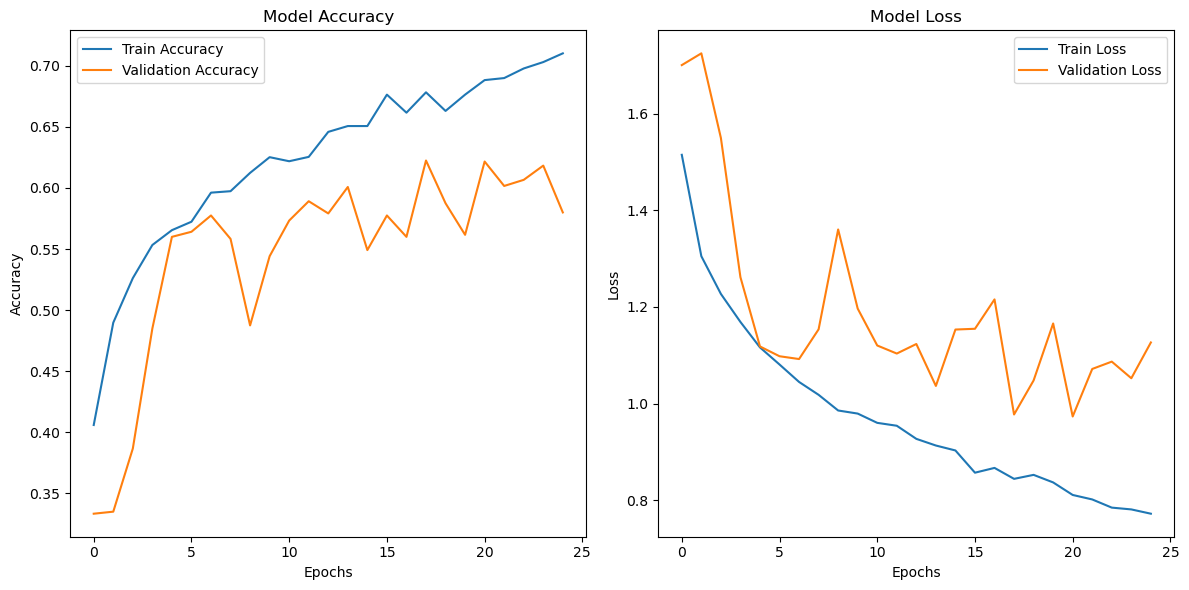

In [18]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.plot(history_1.history['accuracy'], label='Train Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.plot(history_1.history['loss'], label='Train Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define Updated Model 2
model_2 = models.Sequential()

# First Convolutional Layer with larger filters and Adam optimizer
model_2.add(layers.Conv2D(128, (5, 5), activation='linear', kernel_regularizer=regularizers.l2(0.001), input_shape=(32, 32, 3)))  # Larger kernel
model_2.add(layers.LeakyReLU(alpha=0.1))
model_2.add(layers.BatchNormalization())
model_2.add(layers.MaxPooling2D((2, 2)))

# Second Convolutional Layer
model_2.add(layers.Conv2D(256, (3, 3), activation='linear', kernel_regularizer=regularizers.l2(0.001)))
model_2.add(layers.LeakyReLU(alpha=0.1))
model_2.add(layers.BatchNormalization())
model_2.add(layers.MaxPooling2D((2, 2)))

# Third Convolutional Layer with more filters
model_2.add(layers.Conv2D(256, (3, 3), activation='linear', kernel_regularizer=regularizers.l2(0.001)))
model_2.add(layers.LeakyReLU(alpha=0.1))
model_2.add(layers.BatchNormalization())
model_2.add(layers.MaxPooling2D((2, 2)))

# Add a global average pooling layer
model_2.add(layers.GlobalAveragePooling2D())

# Fully Connected Layer with increased neurons
model_2.add(layers.Dense(512, activation='linear', kernel_regularizer=regularizers.l2(0.001)))
model_2.add(layers.LeakyReLU(alpha=0.1))  # Leaky ReLU
model_2.add(layers.Dropout(0.3))  # Reduced dropout rate

# Output layer
model_2.add(layers.Dense(6, activation='softmax'))  # Assuming 6 classes

# Compile the model with Adam optimizer
model_2.compile(optimizer=Adam(learning_rate=1e-3),  # Using Adam with a higher learning rate
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Print the model summary
model_2.summary()

# Define callbacks for better training control
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

# Train the model
history_2 = model_2.fit(
    datagen.flow(train_images_normalized, train_labels, batch_size=32),
    epochs=25,
    validation_data=(validation_images_normalized, validation_labels),
    shuffle=True,
    callbacks=[early_stopping, reduce_lr]
)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 128)       9728      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 128)       0         
                                                                 
 batch_normalization_4 (Batc  (None, 28, 28, 128)      512       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 256)       295168    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 12, 12, 256)      

2024-12-05 04:44:47.646527: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


132/132 [==============================] - 17s 127ms/step - loss: 2.2428 - accuracy: 0.4257 - val_loss: 2.3853 - val_accuracy: 0.1800 - lr: 0.0010
Epoch 2/25
132/132 [==============================] - 17s 126ms/step - loss: 1.9509 - accuracy: 0.4976 - val_loss: 3.0909 - val_accuracy: 0.2142 - lr: 0.0010
Epoch 3/25
132/132 [==============================] - 17s 126ms/step - loss: 1.7969 - accuracy: 0.5202 - val_loss: 3.1016 - val_accuracy: 0.1842 - lr: 0.0010
Epoch 4/25
132/132 [==============================] - 17s 128ms/step - loss: 1.6338 - accuracy: 0.5664 - val_loss: 2.6210 - val_accuracy: 0.3875 - lr: 5.0000e-04
Epoch 5/25
132/132 [==============================] - 17s 128ms/step - loss: 1.5433 - accuracy: 0.5802 - val_loss: 2.0465 - val_accuracy: 0.4375 - lr: 5.0000e-04
Epoch 6/25
132/132 [==============================] - 17s 128ms/step - loss: 1.4666 - accuracy: 0.5979 - val_loss: 1.5555 - val_accuracy: 0.5542 - lr: 5.0000e-04
Epoch 7/25
132/132 [==============================]

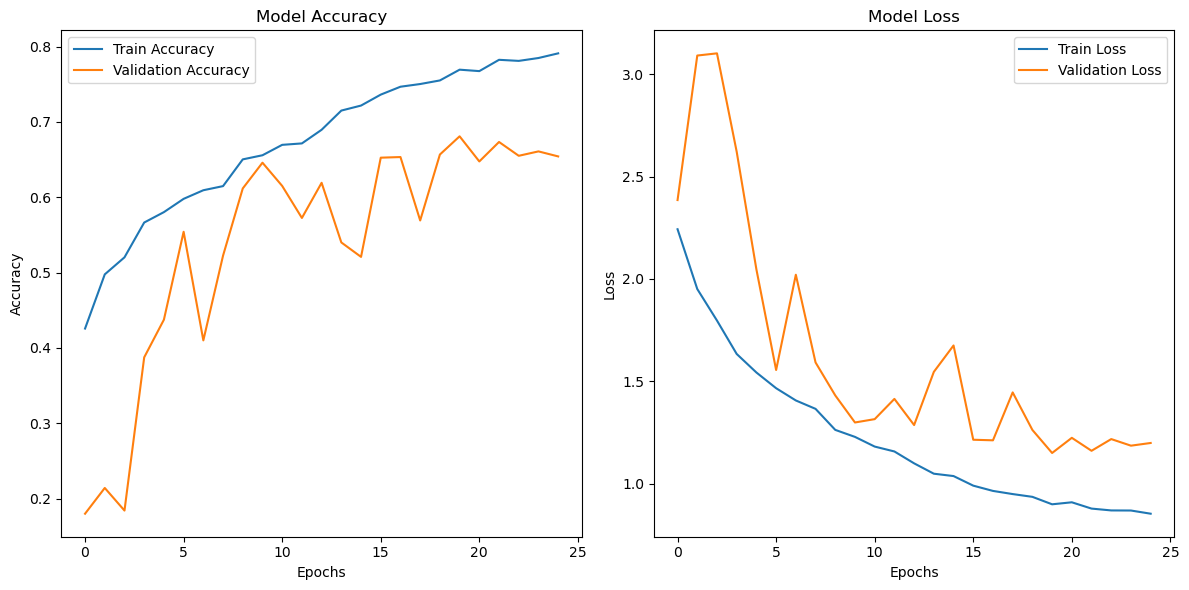

In [20]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.plot(history_2.history['accuracy'], label='Train Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.plot(history_2.history['loss'], label='Train Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [21]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define Model 3 - Updated Architecture
model_3 = models.Sequential()

# First Convolutional Layer
model_3.add(layers.Conv2D(64, (3, 3), strides=(1, 1), activation='relu', kernel_regularizer=regularizers.l2(0.01), padding='same', input_shape=(32, 32, 3)))
model_3.add(layers.BatchNormalization())
model_3.add(layers.MaxPooling2D((2, 2)))

# Second Convolutional Layer
model_3.add(layers.Conv2D(128, (3, 3), strides=(1, 1), activation='relu', kernel_regularizer=regularizers.l2(0.01), padding='same'))
model_3.add(layers.BatchNormalization())
model_3.add(layers.MaxPooling2D((2, 2)))

# Third Convolutional Layer
model_3.add(layers.Conv2D(256, (3, 3), strides=(1, 1), activation='relu', kernel_regularizer=regularizers.l2(0.01), padding='same'))
model_3.add(layers.BatchNormalization())
model_3.add(layers.MaxPooling2D((2, 2)))

# Fourth Convolutional Layer
model_3.add(layers.Conv2D(512, (3, 3), strides=(1, 1), activation='relu', kernel_regularizer=regularizers.l2(0.01), padding='same'))
model_3.add(layers.BatchNormalization())

# Global Average Pooling Layer
model_3.add(layers.GlobalAveragePooling2D())

# Fully Connected (Dense) Layer
model_3.add(layers.Dense(256, activation='relu'))
model_3.add(layers.Dropout(0.6))  # Increased dropout to 0.6

# Output Layer
model_3.add(layers.Dense(6, activation='softmax'))  # Assuming 6 classes

# Compile the model
model_3.compile(optimizer=Adam(learning_rate=1e-3),  # Higher initial learning rate
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

# Print model summary
model_3.summary()

# Define callbacks for better training control
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

# Data Augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Train the model
history_3 = model_3.fit(
    datagen.flow(train_images_normalized, train_labels, batch_size=32),
    epochs=25,  # Set to 25 epochs
    validation_data=(validation_images_normalized, validation_labels),
    shuffle=True,
    callbacks=[early_stopping, reduce_lr]
)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 batch_normalization_8 (Batc  (None, 16, 16, 128)      512       
 hNormalization)                                                 
                                                      

2024-12-05 04:51:51.599187: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


132/132 [==============================] - 18s 129ms/step - loss: 5.8891 - accuracy: 0.3840 - val_loss: 4.3829 - val_accuracy: 0.1667 - lr: 0.0010
Epoch 2/25
132/132 [==============================] - 19s 144ms/step - loss: 2.7032 - accuracy: 0.4740 - val_loss: 2.7824 - val_accuracy: 0.2433 - lr: 0.0010
Epoch 3/25
132/132 [==============================] - 20s 150ms/step - loss: 1.8971 - accuracy: 0.4912 - val_loss: 2.2873 - val_accuracy: 0.2425 - lr: 0.0010
Epoch 4/25
132/132 [==============================] - 18s 138ms/step - loss: 1.6846 - accuracy: 0.5067 - val_loss: 1.8417 - val_accuracy: 0.3850 - lr: 0.0010
Epoch 5/25
132/132 [==============================] - 18s 139ms/step - loss: 1.5908 - accuracy: 0.5236 - val_loss: 1.6699 - val_accuracy: 0.4458 - lr: 0.0010
Epoch 6/25
132/132 [==============================] - 18s 139ms/step - loss: 1.5493 - accuracy: 0.5295 - val_loss: 1.5895 - val_accuracy: 0.4900 - lr: 0.0010
Epoch 7/25
132/132 [==============================] - 18s 138ms

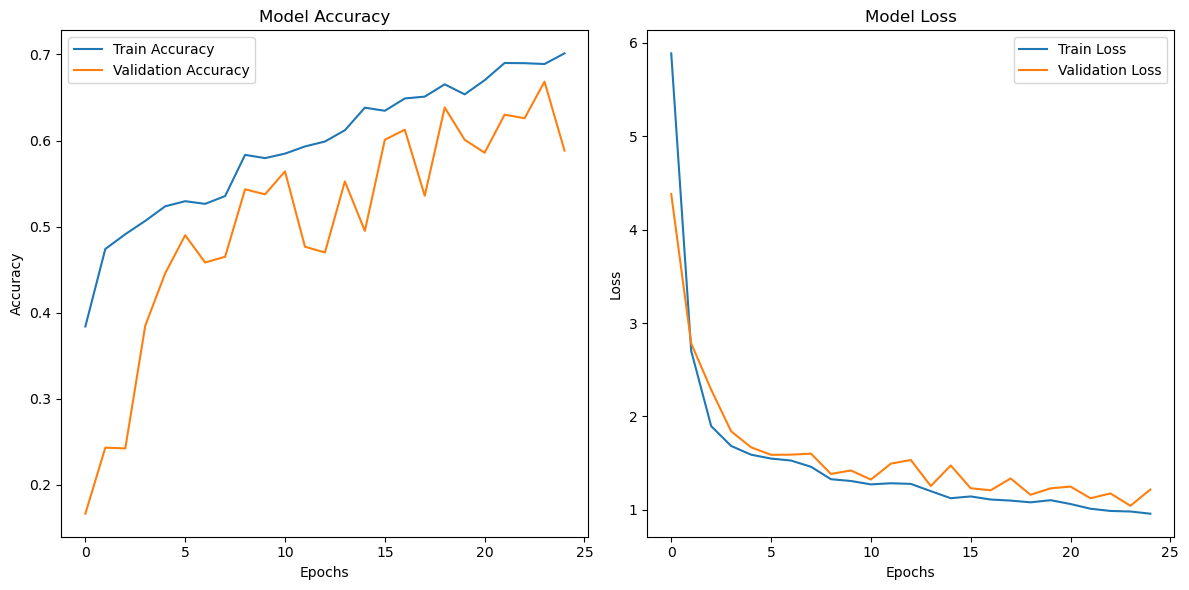

In [22]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.plot(history_3.history['accuracy'], label='Train Accuracy')
plt.plot(history_3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.plot(history_3.history['loss'], label='Train Loss')
plt.plot(history_3.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


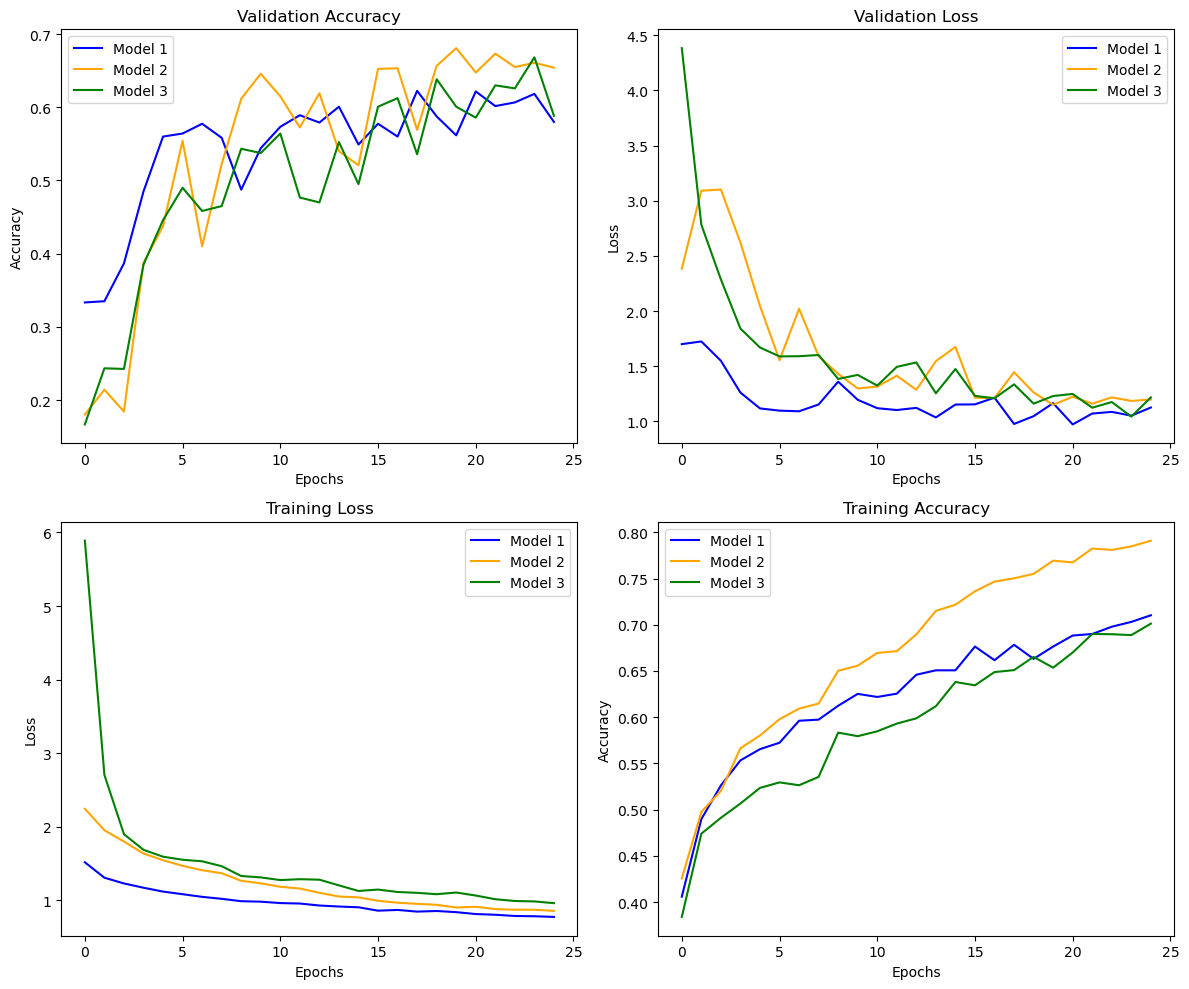

In [23]:
import matplotlib.pyplot as plt

# Extract the relevant data from each history object
val_accuracy_1 = history_1.history['val_accuracy']
val_accuracy_2 = history_2.history['val_accuracy']
val_accuracy_3 = history_3.history['val_accuracy']

val_loss_1 = history_1.history['val_loss']
val_loss_2 = history_2.history['val_loss']
val_loss_3 = history_3.history['val_loss']

loss_1 = history_1.history['loss']
loss_2 = history_2.history['loss']
loss_3 = history_3.history['loss']

accuracy_1 = history_1.history['accuracy']
accuracy_2 = history_2.history['accuracy']
accuracy_3 = history_3.history['accuracy']


# Create subplots for the 4 graphs
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot validation accuracy for all three models
axs[0, 0].plot(val_accuracy_1, label='Model 1', color='blue')
axs[0, 0].plot(val_accuracy_2, label='Model 2', color='orange')
axs[0, 0].plot(val_accuracy_3, label='Model 3', color='green')
axs[0, 0].set_title('Validation Accuracy')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].legend()

# Plot validation loss for all three models
axs[0, 1].plot(val_loss_1, label='Model 1', color='blue')
axs[0, 1].plot(val_loss_2, label='Model 2', color='orange')
axs[0, 1].plot(val_loss_3, label='Model 3', color='green')
axs[0, 1].set_title('Validation Loss')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].legend()

# Plot training loss for all three models
axs[1, 0].plot(loss_1, label='Model 1', color='blue')
axs[1, 0].plot(loss_2, label='Model 2', color='orange')
axs[1, 0].plot(loss_3, label='Model 3', color='green')
axs[1, 0].set_title('Training Loss')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Loss')
axs[1, 0].legend()

# Plot validation accuracy for all three models (same as first graph)
axs[1, 1].plot(accuracy_1, label='Model 1', color='blue')
axs[1, 1].plot(accuracy_2, label='Model 2', color='orange')
axs[1, 1].plot(accuracy_3, label='Model 3', color='green')
axs[1, 1].set_title('Training Accuracy')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('Accuracy')
axs[1, 1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [24]:
# Start of Part d

In [32]:
# Visualizing intermediate activations

import numpy as np
import matplotlib.pyplot as plt

model_3.save('animals_model.h5')

from keras.models import load_model

# Load a pre-trained model 
model = load_model('animals_model.h5')
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 batch_normalization_8 (Batc  (None, 16, 16, 128)      512       
 hNormalization)                                                 
                                                      

In [33]:
from tensorflow.keras.preprocessing import image

# Load and preprocess the image
img_path = '/Users/aba/Desktop/CSI_GRAD/FALL24/CSC_735_MACH/Project/Animals_DataSet/Test_Set/cow/cow (902).jpeg'
img = image.load_img(img_path, target_size=(32, 32))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0) / 255.0

print(img_tensor.shape)

(1, 32, 32, 3)


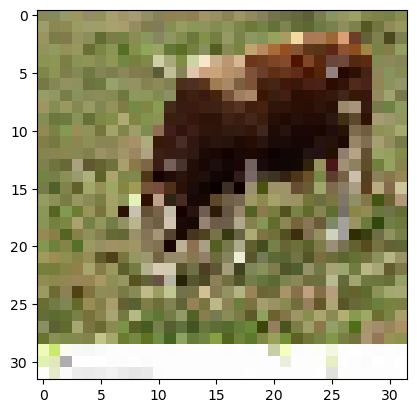

In [34]:
plt.imshow(img_tensor[0])
plt.show()

In [35]:
from keras.models import Model

# Create a model to fetch intermediate activations
layer_outputs = [layer.output for layer in model.layers[:10]]  # First 10 layers
activation_model = Model(inputs=model.input, outputs=layer_outputs)

# Get activations for the input image
activations = activation_model.predict(img_tensor)

1/1 [==============================] - 0s 146ms/step


In [36]:
# Visualize some channels from intermediate activations
def visualize_channels(activations, layer_names, channels_to_display, n_cols=5):
    for layer_activation, layer_name in zip(activations, layer_names):
        print(f"Visualizing layer: {layer_name}")
        n_channels = layer_activation.shape[-1]
        selected_channels = np.random.choice(n_channels, channels_to_display, replace=False)

        n_rows = int(np.ceil(channels_to_display / n_cols))
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols/1.5  , n_rows/1.5))
        
        # Remove space between subplots
        plt.subplots_adjust(wspace=0)
        
        # Flatten axes for easy iteration
        axes = axes.flatten()
        
        for i, ax in enumerate(axes):
            if i < channels_to_display:
                channel_idx = selected_channels[i]
                channel_image = layer_activation[0, :, :, channel_idx]
                ax.imshow(channel_image, cmap="viridis")
            else:
                ax.axis("off")  # Turn off axes for extra subplots
            
            ax.axis("off")
        
        plt.show()

Visualizing layer: conv2d_7


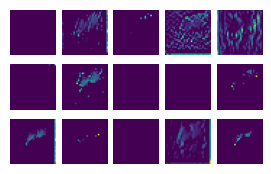

Visualizing layer: batch_normalization_7


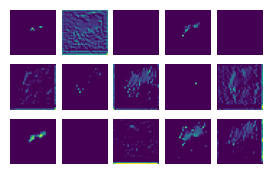

Visualizing layer: max_pooling2d_6


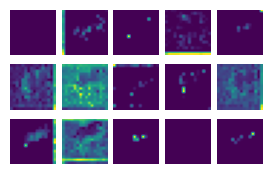

Visualizing layer: conv2d_8


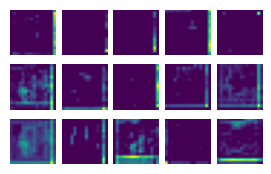

Visualizing layer: batch_normalization_8


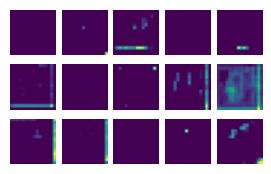

Visualizing layer: max_pooling2d_7


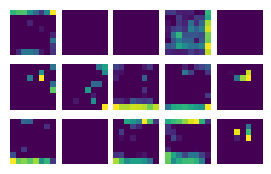

Visualizing layer: conv2d_9


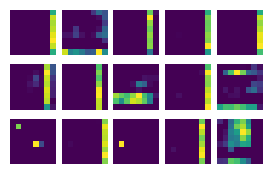

Visualizing layer: batch_normalization_9


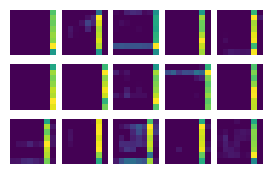

Visualizing layer: max_pooling2d_8


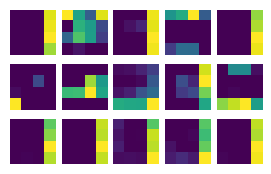

Visualizing layer: conv2d_10


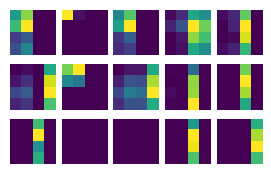

In [37]:
# Get layer names for visualization
layer_names = [layer.name for layer in model.layers[:10]] # First 10 layers


# Visualizing SOME channels
num_channels_to_display = 15 # Displaying 15 channels for each layer
visualize_channels(activations, layer_names, num_channels_to_display)